2024-04-23 20:05:33.677242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 20:05:35.072707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-23 20:05:35.592785: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 20:05:35.593635: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Fo

Epoch 100/1000, Loss: 1.6905081272125244
Epoch 200/1000, Loss: 0.8827940821647644
Epoch 300/1000, Loss: 0.5135043859481812
Epoch 400/1000, Loss: 0.376527339220047
Epoch 500/1000, Loss: 0.32989567518234253
Epoch 600/1000, Loss: 0.31263500452041626
Epoch 700/1000, Loss: 0.3033244013786316
Epoch 800/1000, Loss: 0.2958318889141083
Epoch 900/1000, Loss: 0.288622111082077
Epoch 1000/1000, Loss: 0.28083956241607666


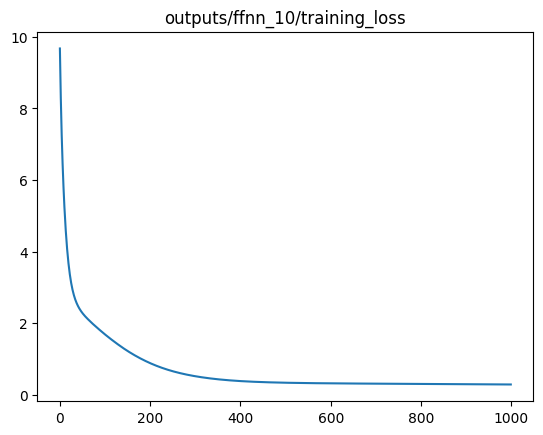

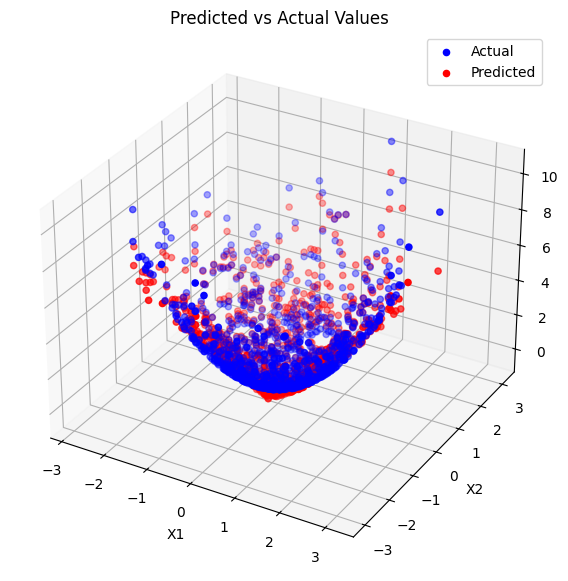

Epoch 100/1000, Loss: 1.3296030759811401
Epoch 200/1000, Loss: 0.6981372833251953
Epoch 300/1000, Loss: 0.40269508957862854
Epoch 400/1000, Loss: 0.2811414301395416
Epoch 500/1000, Loss: 0.23187319934368134
Epoch 600/1000, Loss: 0.2073216289281845
Epoch 700/1000, Loss: 0.19081491231918335
Epoch 800/1000, Loss: 0.17776262760162354
Epoch 900/1000, Loss: 0.166056290268898
Epoch 1000/1000, Loss: 0.15509149432182312


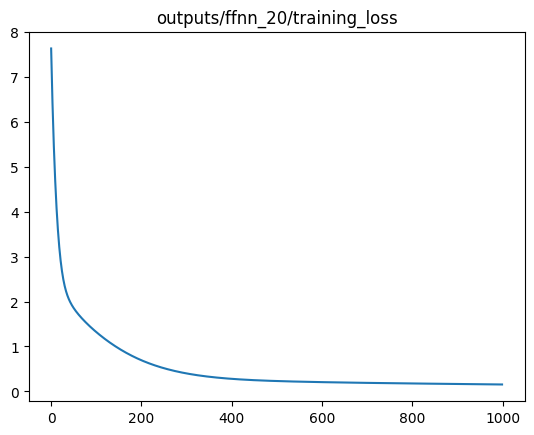

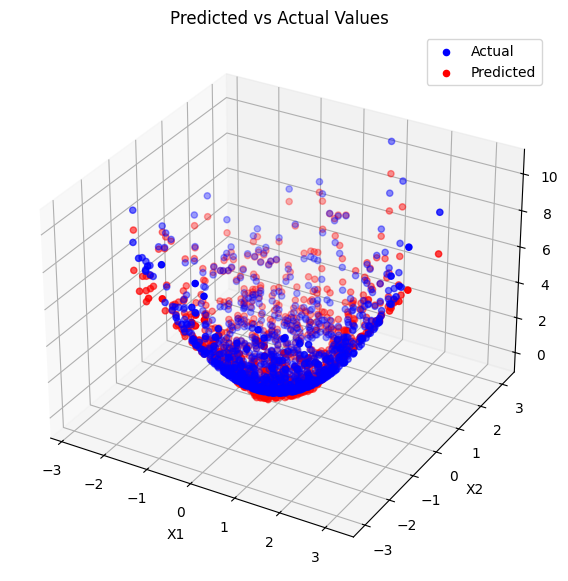

Epoch 100/1000, Loss: 1.088544487953186
Epoch 200/1000, Loss: 0.5765172243118286
Epoch 300/1000, Loss: 0.3596448600292206
Epoch 400/1000, Loss: 0.27128729224205017
Epoch 500/1000, Loss: 0.23247338831424713
Epoch 600/1000, Loss: 0.21152985095977783
Epoch 700/1000, Loss: 0.19713692367076874
Epoch 800/1000, Loss: 0.1851683109998703
Epoch 900/1000, Loss: 0.17431046068668365
Epoch 1000/1000, Loss: 0.1638798862695694


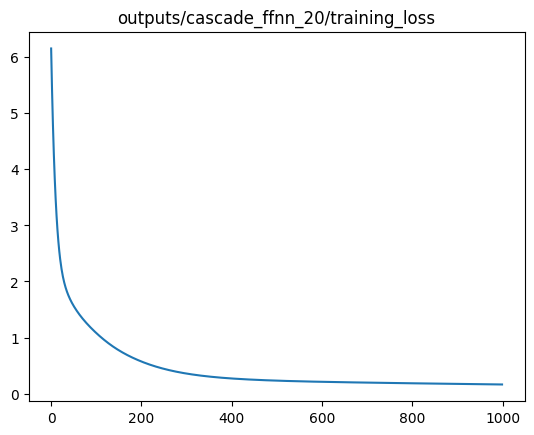

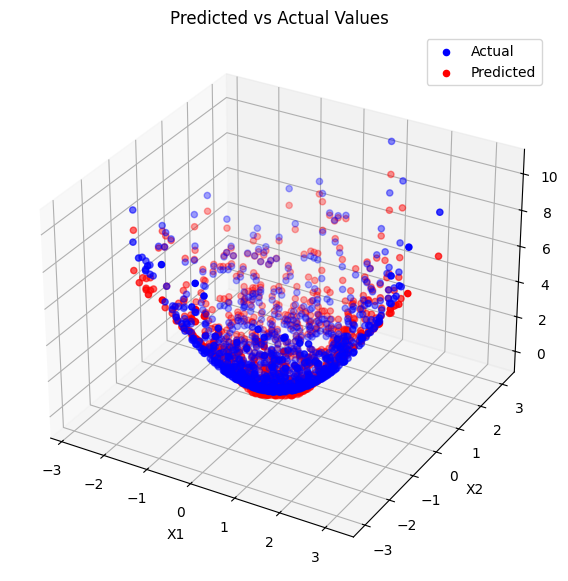

Epoch 100/1000, Loss: 1.5979145765304565
Epoch 200/1000, Loss: 0.4384153485298157
Epoch 300/1000, Loss: 0.21715572476387024
Epoch 400/1000, Loss: 0.16386061906814575
Epoch 500/1000, Loss: 0.1302236020565033
Epoch 600/1000, Loss: 0.10761154443025589
Epoch 700/1000, Loss: 0.09117898344993591
Epoch 800/1000, Loss: 0.07888329774141312
Epoch 900/1000, Loss: 0.07029557228088379
Epoch 1000/1000, Loss: 0.06389784812927246


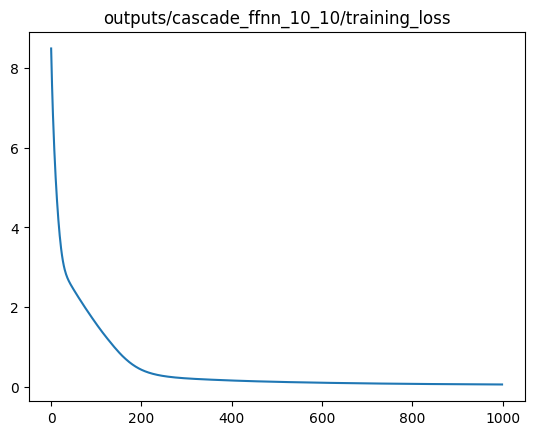

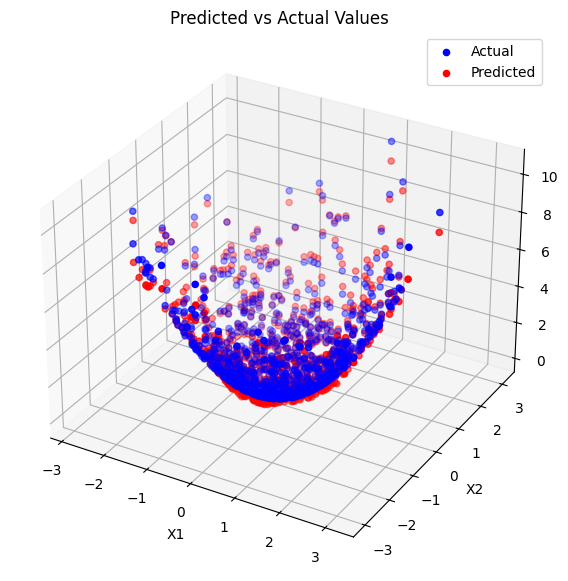

Epoch 100/1000, Loss: 1.6095027923583984
Epoch 200/1000, Loss: 0.8617691397666931
Epoch 300/1000, Loss: 0.48382189869880676
Epoch 400/1000, Loss: 0.32548609375953674
Epoch 500/1000, Loss: 0.26053759455680847
Epoch 600/1000, Loss: 0.23005740344524384
Epoch 700/1000, Loss: 0.2108851969242096
Epoch 800/1000, Loss: 0.19648955762386322
Epoch 900/1000, Loss: 0.18415407836437225
Epoch 1000/1000, Loss: 0.17259973287582397


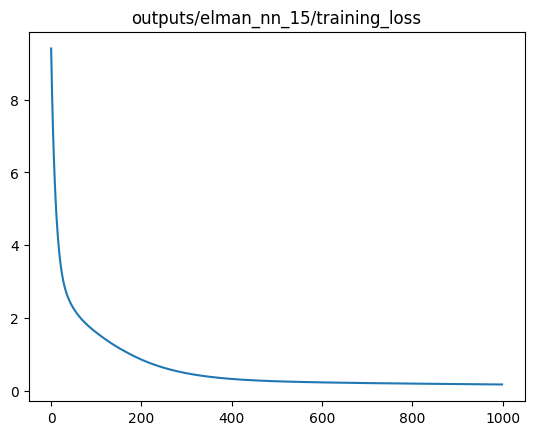

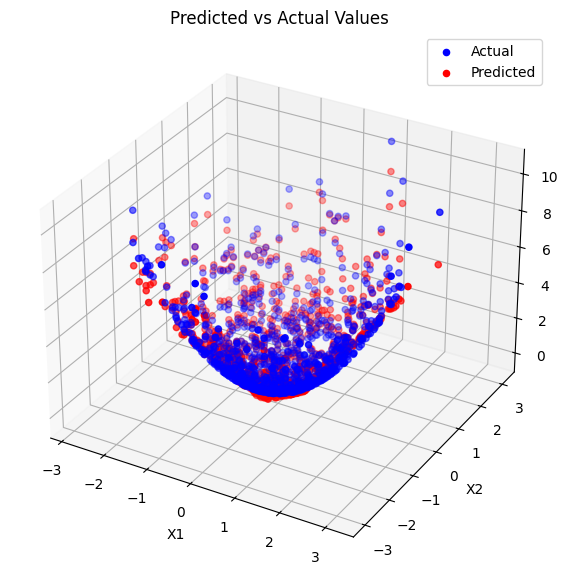

Epoch 100/1000, Loss: 2.7008330821990967
Epoch 200/1000, Loss: 2.0456197261810303
Epoch 300/1000, Loss: 0.2929580807685852
Epoch 400/1000, Loss: 0.16722506284713745
Epoch 500/1000, Loss: 0.12478847056627274
Epoch 600/1000, Loss: 0.10770822316408157
Epoch 700/1000, Loss: 0.0979790985584259
Epoch 800/1000, Loss: 0.08945690840482712
Epoch 900/1000, Loss: 0.0795455202460289
Epoch 1000/1000, Loss: 0.06987076997756958


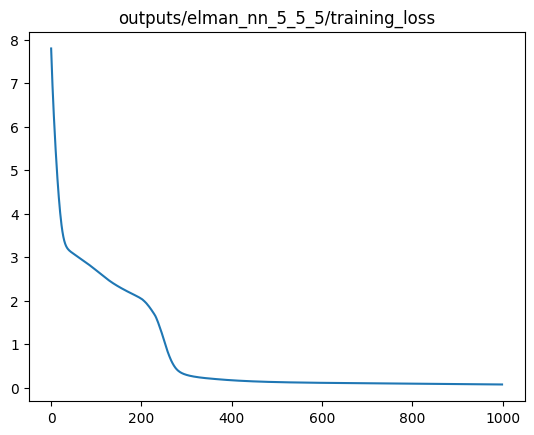

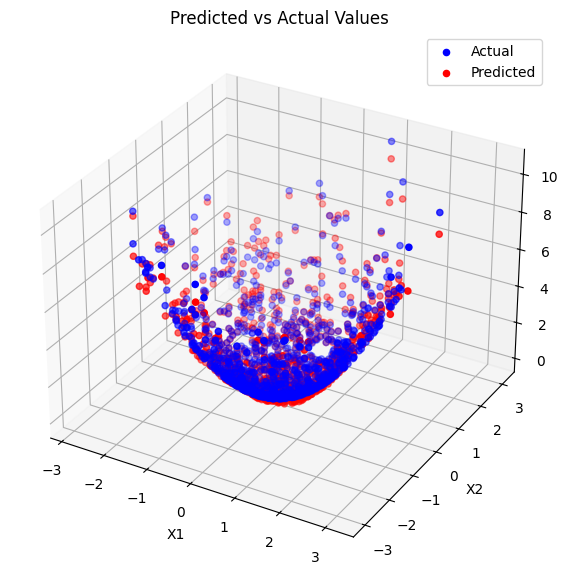

The best model is 'cascade_ffnn_10_10' with a validation loss of 0.06389784812927246.


In [90]:
#  x - y^2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd

output_dir = "outputs/"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

def save_n_plot(*args, filename="file"):
    foldername = "/".join(filename.split("/")[:-1])
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    plt.title(filename)
    plt.plot(*args)
    plt.savefig(filename+".png")
    plt.show()

def save_n_plot_3d(X, y, filename="file_3d"):
    foldername = "/".join(filename.split("/")[:-1])
    if foldername == "":
        foldername = output_dir
        filename = output_dir+filename
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], y)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.title(filename)
    plt.savefig(filename+".png")
    plt.show()

class FFNN(tf.keras.Model):
    def __init__(self, num_neurons):
        super(FFNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(num_neurons, activation='relu')
        self.fc2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

class CascadeFFNN(tf.keras.Model):
    def __init__(self, num_neurons1, num_neurons2=None):
        super(CascadeFFNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(num_neurons1, activation='relu')
        if num_neurons2:
            self.fc2 = tf.keras.layers.Dense(num_neurons2, activation='relu')
            self.fc3 = tf.keras.layers.Dense(1)
        else:
            self.fc2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.fc1(inputs)
        if hasattr(self, 'fc3'):
            x = self.fc2(x)
            x = self.fc3(x)
        else:
            x = self.fc2(x)
        return x

class ElmanNN(tf.keras.Model):
    def __init__(self, num_neurons1, num_neurons2=None, num_neurons3=None):
        super(ElmanNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(num_neurons1, activation='relu')
        if num_neurons2:
            self.fc2 = tf.keras.layers.Dense(num_neurons2, activation='relu')
            if num_neurons3:
                self.fc3 = tf.keras.layers.Dense(num_neurons3, activation='relu')
                self.fc4 = tf.keras.layers.Dense(1)
            else:
                self.fc3 = tf.keras.layers.Dense(1)
        else:
            self.fc2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.fc1(inputs)
        if hasattr(self, 'fc4'):
            x = self.fc2(x) 
            x = self.fc3(x)
            x = self.fc4(x)
        elif hasattr(self, 'fc3'):
            x = self.fc2(x)
            x = self.fc3(x)
        else:
            x = self.fc2(x)
        return x

num_samples = 1000

X_val = tf.random.normal((num_samples, 2))
y_val = X_val[:, 0] - tf.square(X_val[:, 1])  # Calculate x - y^2 for X_val

X = tf.random.normal((num_samples, 2))
y = X[:, 0] - tf.square(X[:, 1])  # Calculate x - y^2 for X


def train_and_plot_model(model, loss_fn, optimizer, X, y, X_val, y_val, model_name, num_epochs=1000):

    foldername = output_dir + model_name
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    
    losses = []
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            outputs = model(X)
            loss = loss_fn(y, outputs)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        losses.append(loss.numpy())
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.numpy()}')

    loss_df = pd.DataFrame({'Epoch': range(num_epochs), 'Loss': losses})
    loss_df.to_csv(output_dir + model_name + "/losses.csv", index=False)

    save_n_plot(range(num_epochs), losses, filename=output_dir + model_name + "/training_loss")

    y_pred = model(X_val)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_val[:, 0], X_val[:, 1], y_val, color='blue', label='Actual')

    ax.scatter(X_val[:, 0], X_val[:, 1], y_pred.numpy(), color='red', label='Predicted')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Predicted vs Actual Values')
    ax.legend()

    plt.savefig(output_dir + model_name + "/predicted_vs_actual_3d.png")
    plt.show()

    return losses

models = [FFNN(10), FFNN(20), CascadeFFNN(20), CascadeFFNN(10, 10), ElmanNN(15), ElmanNN(5, 5, 5)]
model_names = ["ffnn_10", "ffnn_20", "cascade_ffnn_20", "cascade_ffnn_10_10", "elman_nn_15", "elman_nn_5_5_5"]

criterions = [tf.keras.losses.MeanSquaredError() for _ in range(6)]
optimizers = [tf.keras.optimizers.SGD() for _ in range(6)]

validation_losses = []
for model, loss_fn, optimizer, model_name in zip(models, criterions, optimizers, model_names):
    loss = train_and_plot_model(model, loss_fn, optimizer, X, y, X_val, y_val, model_name)
    validation_losses.append((model_name, loss))

best_model_name = None
best_validation_loss = float('inf')

for model_name, losses in validation_losses:
    min_loss = min(losses)
    if min_loss < best_validation_loss:
        best_validation_loss = min_loss
        best_model_name = model_name

print(f"The best model is '{best_model_name}' with a validation loss of {best_validation_loss}.")
